In [69]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [42]:
data = 2* np.random.rand(10000,2) -1

In [43]:
data

array([[-0.41482448,  0.89734392],
       [ 0.09347517,  0.02638227],
       [-0.54367711,  0.21097057],
       ...,
       [-0.07826655, -0.19381375],
       [-0.06442498, -0.27870746],
       [-0.93726417,  0.09833592]])

In [44]:
# 输出特定行
data[[0,1]]

array([[-0.41482448,  0.89734392],
       [ 0.09347517,  0.02638227]])

In [53]:
# 输出特定列
# 限定只输出前后5行,suppress输出详细信息（非科学计数法）
np.set_printoptions(edgeitems=5,suppress=True)  
data[:,0]

array([-0.41482448,  0.09347517, -0.54367711, -0.34027746,  0.61283586,
       ...,  0.39889585, -0.47261834, -0.07826655, -0.06442498,
       -0.93726417])

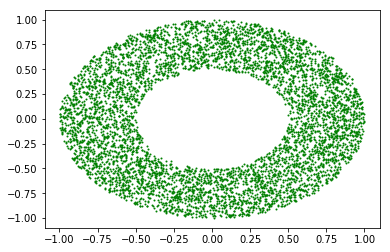

In [63]:
# 画图
x = data[:,0]
y = data[:,1]
idx = x**2 + y**2 <1  # 限定圆
hole = x**2 + y**2 <0.25 # 内部圆
idx = np.logical_and(idx,~hole)  # 与运算 ~非
plt.plot(x[idx],y[idx],'go',markersize=1)
print('',end='')

In [50]:
pic = np.random.uniform(0,255,size=(5,5))
pic[:2]

array([[  1.05333199, 184.44737514, 212.69425041, 116.93164282,
         77.92418287],
       [ 74.53579511, 160.57135936, 162.85490443, 252.63132609,
        202.74830161]])

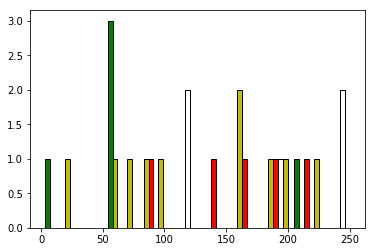

In [61]:
# 直方图绘制
plt.hist(pic,
         bins=10,  #  分20块
         color=('g','y','r','w','y'), # 颜色 绿色
         edgecolor='k' )# 边缘颜色
print('',end='')

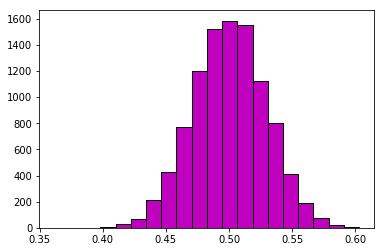

In [67]:
# 验证中心极限定理
N = 10000
times = 100
z = np.zeros(N)
for i in range(times):
    z += np.random.rand(N)
z /= times
plt.hist(z, bins=20, color='m',edgecolor='k') 
print('',end='')

In [68]:
pic = np.random.rand(3,4)
pic

array([[0.79653995, 0.67406655, 0.40961614, 0.47424537],
       [0.02666534, 0.43471633, 0.40201969, 0.9626717 ],
       [0.24138013, 0.99977011, 0.78953641, 0.20416354]])

In [71]:
# 转换为pandas
data = pd.DataFrame(data=pic, columns=list('abcd'))
data[list('ad')]

,a,d
0,0.796540,0.474245
1,0.026665,0.962672
2,0.241380,0.204164


In [72]:
# 保存结果
data.to_csv('data.csv',
            index=False, # 不保存索引
            header = True  # 保存文件头
           )

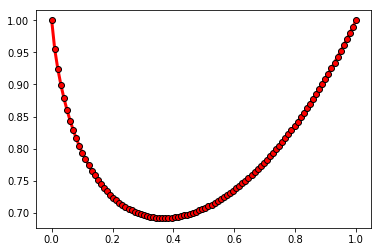

In [82]:
# 函数绘制
# x = np.arange(0, 2, 0.1)
x = np.linspace(0, 1, 100)
y = x**x 
plt.plot(x, y, 'ro-' # 红线
         , lw=3, # 线宽
         mec = 'k' # 点边框 
        )
print('',end='')

Wall time: 63.8 ms


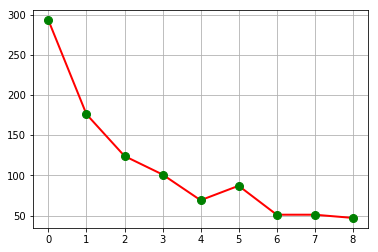

In [109]:
%%time
# Sample1 :本福特定律
def firstd(x):
#     while x>=10:
#         x//=10
#     return x
    x = str(x)
    return int(x[0])  # 更优解法效率提升40倍
n = 1
frequency = [0]*9
for i in range(1,1000):
    n*=i
    m = firstd(n)-1
    frequency[m]+=1
plt.plot(frequency,'r-',lw=2)
plt.plot(frequency,'go',markersize=8)
plt.grid(True)